# Backpropagation Lab





In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [3]:
def getData(filename, cols):
  data_arff = arff.loadarff(filename)
  data_pd = pd.DataFrame(data_arff[0])
  data_pd_one_hot = pd.get_dummies(data_pd, columns=cols, dtype=int)
  data_np = data_pd_one_hot.to_numpy()
  X = data_np[:,:-3]
  Y = data_np[:,-3:]

  Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

  return Xtrain, Xtest, ytrain, ytest

def runModel(Xtrain, Xtest, ytrain, ytest):
  clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd',alpha=0,batch_size=1, learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000)
  clf.fit(Xtrain, ytrain)
  trainAcc = clf.score(Xtrain, ytrain)
  testAcc = clf.score(Xtest, ytest)
  iters = clf.n_iter_

  return trainAcc, testAcc, iters, clf

# numIters = []
# trainAccs = []
# testAccs = []

# for i in range(8):
#   Xtrain, Xtest, ytrain, ytest = getData("iris.arff", ['class'])
#   trainAcc, testAcc, iters = runModel(Xtrain, Xtest, ytrain, ytest)
#   numIters.append(iters)
#   trainAccs.append(trainAcc)
#   testAccs.append(testAcc)

# print(numIters)
# print(sum(numIters)/len(numIters))
# print(trainAccs)
# print(sum(trainAccs)/len(trainAccs))
# print(testAccs)
# print(sum(testAccs)/len(testAccs))

Xtrain, Xtest, ytrain, ytest = getData("iris.arff", ['class'])
*_, clf = runModel(Xtrain, Xtest, ytrain, ytest)
print(clf.predict_proba(Xtest))


[[6.69210011e-06 3.39949712e-02 9.80875812e-01]
 [9.99510407e-01 3.88764517e-03 3.88672864e-12]
 [6.05858070e-06 3.47981724e-02 9.83575533e-01]
 [3.38090870e-04 9.78174501e-01 6.80154377e-03]
 [9.98520630e-01 1.59255543e-02 1.39217062e-11]
 [9.99564690e-01 3.69986556e-03 3.36822019e-12]
 [8.52025875e-04 9.91690698e-01 1.03481229e-03]
 [2.04663887e-03 9.97631910e-01 1.61674897e-04]
 [9.99463930e-01 2.68565343e-03 4.70721341e-12]
 [3.87182822e-06 2.52547081e-02 9.92520956e-01]
 [9.99804812e-01 1.28473424e-03 1.43802780e-12]
 [1.91793031e-06 9.16665564e-03 9.98052658e-01]
 [9.99448815e-01 4.64244006e-03 4.65705878e-12]
 [1.74127766e-03 9.97080720e-01 2.40405752e-04]
 [8.31658623e-04 9.88084629e-01 1.38880837e-03]
 [9.99406520e-01 2.87329022e-03 5.15860321e-12]
 [9.99626901e-01 2.56465978e-03 2.94561034e-12]
 [9.99458590e-01 4.70136737e-03 4.40223046e-12]
 [1.43270974e-05 1.75852296e-01 8.98339951e-01]
 [6.00173833e-03 9.95836014e-01 4.82787628e-05]
 [3.49198851e-04 9.80469143e-01 6.568811

***Discussion:***

|  Run  | Iterations | Training Accuracy | Test Accuracy |
| :---: | :--------: | :--------: | :---: |
|  1  | 415 | 96.6 | 96.6 |
|  2  | 354 | 96.6 | 96.6 |
|  3  | 266 | 98.3 | 93.3 |
|  4  | 354 | 97.5 | 93.3 |
|  5  | 371 | 97.5 | 96.6 |
|  6  | 379 | 97.5 | 96.6 |
|  7  | 409 | 94.2 | 93.3 |
|  8  | 324 | 98.3 | 96.6 |
| **Avg** | **359** | **97.1** | **95.4** |

I observe that the training set accuracy is quite constant, never varying too much from the highest probability. This mkaes sense, since we are training the model without early stopping, we are getting as accurate as possible on the training set as we fit our model. Even so, the accuracy on the test set is quite good across all runs, which I did not really expect. I guess, with the iris data, this may be a bad accuracy, but it is still quite decent. Furthermore, the test set is just a subset of the original data, so maybe the model wouldn't generalize as well to novel data that is less like the training set.

Observing the probabilities output for one of the test sets, it is easy to see that the model is usually quite confident in the class that it predicts. There is really only one class that is close to 1, while the others are super small. This is impressive, and shows how well the model has fit the data.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

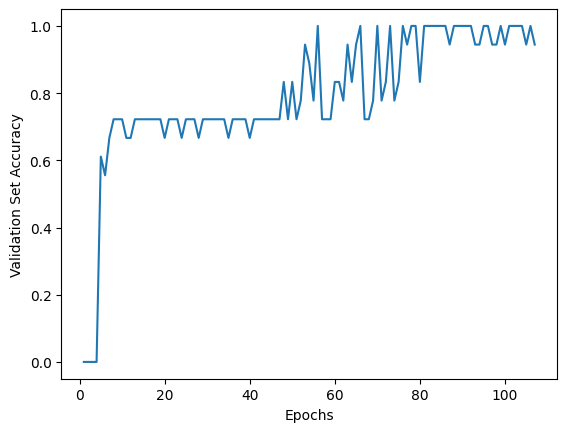

In [13]:
def runModelVal(Xtrain, Xtest, ytrain, ytest):
  clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd',alpha=0,batch_size=1, learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000, early_stopping = True, validation_fraction = 0.15)
  clf.fit(Xtrain, ytrain)
  trainAcc = clf.score(Xtrain, ytrain)
  testAcc = clf.score(Xtest, ytest)
  iters = clf.n_iter_

  return trainAcc, testAcc, iters, clf

# numIters = []
# trainAccs = []
# testAccs = []
# bestVal = []

# for i in range(8):
#   Xtrain, Xtest, ytrain, ytest = getData("iris.arff", ['class'])
#   trainAcc, testAcc, iters, clf = runModelVal(Xtrain, Xtest, ytrain, ytest)
#   numIters.append(round(iters, 1))
#   trainAccs.append(round(trainAcc*100, 1))
#   testAccs.append(round(testAcc*100, 1))
#   bestVal.append(round(clf.best_validation_score_*100, 1))

# print(numIters)
# print(sum(numIters)/len(numIters))
# print(trainAccs)
# print(sum(trainAccs)/len(trainAccs))
# print(testAccs)
# print(sum(testAccs)/len(testAccs))
# print(bestVal)
# print(sum(bestVal)/len(bestVal))

Xtrain, Xtest, ytrain, ytest = getData("iris.arff", ['class'])
*_, clf = runModelVal(Xtrain, Xtest, ytrain, ytest)
scores = clf.validation_scores_
plt.plot(list(range(1, len(scores) + 1)), scores)
plt.xlabel("Epochs")
plt.ylabel("Validation Set Accuracy")
plt.show()


***Discussion:***

|  Run  | Iterations | Training Accuracy | Test Accuracy | Best Validation Score |
| :---: | :--------: | :--------: | :---: | :---: |
|  1  | 119 | 94.2 | 90.0 | 94.4  |
|  2  | 127 | 96.7 | 96.7 | 100.0 |
|  3  | 111 | 96.7 | 90.0 | 100.0 |
|  4  | 121 | 96.7 | 90.0 | 94.4  |
|  5  | 113 | 90.0 | 93.3 | 100.0 |
|  6  | 122 | 97.5 | 96.7 | 100.0 |
|  7  | 58  | 67.5 | 60.0 | 61.1  |
|  8  | 126 | 97.5 | 96.7 | 100.0 |
| **Avg** | **112** | **92.1** | **89.2** | **93.7** |

I observe that the model did quite a bit worse on all things when we did early stopping, though that is to be expected due to the simplicity of the data set and the lack of noise. OVerfitting the data set is not a problem due to its relatively low lack of noise, so stopping early just causes us not to fit the data as well as we could accurately do. It was interesting to see that there was one run in particular that did terrible compared to any this time or last. Random chance led to that, I assume. It was also interesting to see that the best validation score was often 100%.

For the plot of validation scores by epoch, it was interesting to see that there were plateaus along the way to the high score. I wonder if this comes from the network getting caught up in training and not improving for some time as it slowly changes the weights (since the learning rate is so small, the network seems to be able to get stuck in troughs or the like in an arror curve). The curve was also not very smooth, but it did follow a general upward trend, which is to be expected.


### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

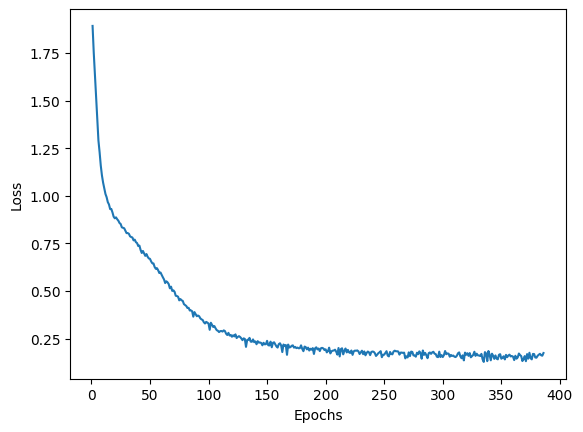

In [16]:
def runModelLoss(Xtrain, Xtest, ytrain, ytest, loss):
  clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd',alpha=loss,batch_size=1, learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000)
  clf.fit(Xtrain, ytrain)
  trainAcc = clf.score(Xtrain, ytrain)
  testAcc = clf.score(Xtest, ytest)
  iters = clf.n_iter_

  return trainAcc, testAcc, iters, clf

# numIters = []
# trainAccs = []
# testAccs = []
# bestLoss = []

# alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
# for i in alphas:
#   Xtrain, Xtest, ytrain, ytest = getData("iris.arff", ['class'])
#   trainAcc, testAcc, iters, clf = runModelLoss(Xtrain, Xtest, ytrain, ytest, i)
#   numIters.append(round(iters, 1))
#   trainAccs.append(round(trainAcc*100, 1))
#   testAccs.append(round(testAcc*100, 1))
#   bestLoss.append(round(clf.best_loss_*100, 1))

# print(numIters)
# print(trainAccs)
# print(testAccs)
# print(bestLoss)

Xtrain, Xtest, ytrain, ytest = getData("iris.arff", ['class'])
*_, clf = runModelLoss(Xtrain, Xtest, ytrain, ytest, 0.00001)
loss_curve = clf.loss_curve_
plt.plot(list(range(1, len(loss_curve) + 1)), loss_curve)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

***Discussion:***

|  Run  | Iterations | Training Accuracy | Test Accuracy | Best Loss Value |
| :---: | :--------: | :--------: | :---: | :---: |
|  0.1  | 149 | 46.7 | 43.3 | 163.5 |
|  0.01  | 464 | 97.5 | 100.0 | 74.2 |
|  0.001  | 296 | 97.5 | 96.7 | 23.6 |
|  0.0001  | 261 | 98.3 | 93.3 | 13.1  |
|  0.00001  | 371 | 97.5 | 100.0 | 11.8 |
|  0.000001  | 359 | 98.3 | 93.3 | 10.0 |
|  0.0000001  | 302  | 96.7 | 96.7 | 13.5  |

The regularization value $\alpha = 0.00001$ gave me the best results, with both good accuracies and a great best loss.

For the iris data set, it seems like a MLP with no regularization or early stopping gives the best results. This, again, must just be because the data does not have the noise that is common for other data sets which would make these techniques more helpful. Regardess, I can see that early stopping may be useful for more noist data.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

In [36]:
vowel_data = arff.loadarff("vowel.arff")
vowel_data_pd = pd.DataFrame(vowel_data[0])
print(vowel_data_pd.value_counts("Class"))

iris_data = arff.loadarff("iris.arff")
iris_data_pd = pd.DataFrame(iris_data[0])
print(iris_data_pd.value_counts("class"))

Class
b'hAd'    90
b'hEd'    90
b'hId'    90
b'hOd'    90
b'hUd'    90
b'hYd'    90
b'had'    90
b'hed'    90
b'hid'    90
b'hod'    90
b'hud'    90
Name: count, dtype: int64
class
b'Iris-setosa'        50
b'Iris-versicolor'    50
b'Iris-virginica'     50
Name: count, dtype: int64


***Discussion:***

For the Iris data set, the baseline accuracy would be 33% (as all classes are of equal size and there are three classes).

For the Vowel data set, the baseline accuracy would be 9% (as all classes are of equal size and there are eleven classes). This is much worse than the Iris baseline accuracy. The fact that this data set has so many classes will contirbute to the lower accuracy compared to the Iris data set even after training, I think.

I think the feature that should not be used in the training is the speaker name. This should be unique for each speaker (or if it is not, probably should not relate at all to the class outcome), and so does not really provide any information to the model when it is trained. It is useless to have in there, as the model will likely just weight it to 0 anyway.

Likewise, I do not think the sex of the speaker should matter in considering the pronunciation of a vowel, so I do not think that this should have any effect on the Class outcome. However, it may be that the speaker's sex does relate to the Class outcome, so I do not think we should get rid of it.

I do not think it is important to keep the Train or Test column either, as this does not actually tell us anything about the Class or features, but rather tells us how we can split the data for training and testing. So, I think we can get rid of that feature too.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [16]:
def getDataVowel():
  data_arff = arff.loadarff("vowel.arff")
  data_pd = pd.DataFrame(data_arff[0])
  data_drop = data_pd.drop(["Train or Test", "Speaker Number"], axis = 1)
  data_bin = data_drop.replace(b'Male', 0).replace(b'Female', 1)
  data_one_hot = pd.get_dummies(data_bin, columns=['Class'], dtype=int)
  data_np = data_one_hot.to_numpy()
  X = data_np[:,:-12]
  Y = data_np[:,-11:]

  return X, Y

def runModelLR(Xtrain, Xtest, ytrain, ytest, rate):
  clf = MLPClassifier(hidden_layer_sizes=[22], activation='logistic', solver='sgd',alpha=0,batch_size=1, learning_rate_init=rate, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=2000)
  clf.fit(Xtrain, ytrain)
  trainAcc = clf.score(Xtrain, ytrain)
  testAcc = clf.score(Xtest, ytest)

  return trainAcc, testAcc, clf

trainAccs = []
testAccs = []
epochs = []

rates = [0.0001, 0.01, 0.01, 1, 10]

# for i in rates:
#   Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25)
#   trainAcc, testAcc, clf = runModelLR(Xtrain, Xtest, ytrain, ytest, i)
#   trainAccs.append(trainAcc)
#   testAccs.append(testAcc)
#   epochs.append(clf.n_iter_)

print(trainAccs)
print(testAccs)
print(epochs)

[]
[]
[]


***Discussion:***

| Learning Rate | Epochs | Training Accuracy | Test Accuracy |
| :-----------: | :----: | :---------------: | :-----------: |
|    0.0001     |  2,000 |       14.4        |      10.1     |
|     0.01      |  1,515 |       96.5        |      83.9     |
|     **0.1**       |    **859** |       **98.6**        |      **80.2**     |
|      1        |    212 |       52.6        |      53.6     |
|     10        |     63 |       9.9         |       6.5     |

As for the time, the lower learning rates (0.0001 and 0.01) took forever to run (upwards of 10 minutes), which wasn't too surprising since the rate was extremely low. It also reached the max number of iterations, which I set to be 2000. So, smaller learning rates take a lot longer to learn and many more epochs to do so, since the changes they can make each time are so small.

As for the accuracy, it was pretty bad for the lowest rates, because they couldn't finish their training in a good number of epochs. For the greater learning rates, the accuracy was also fairly bad, since they were making too large of changes in the fitting process. The training accuracy was much better than the test accuracy, there was a bigger difference between these two in this set than the Iris set.

The learning rate that is the best is 0.1, as it gives a good training set accuracy and almost the highest test set accuracy, while using half as many epochs as the next best learning rate.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [70]:
X, Y = getDataVowel()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25)
clf = MLPClassifier(hidden_layer_sizes=[128], activation='logistic', solver='sgd',alpha=0,batch_size=1, learning_rate_init=0.1, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=2000)
clf.fit(Xtrain, ytrain)
print(clf.score(Xtrain, ytrain))
print(clf.score(Xtest, ytest))
print(clf.n_iter_)

<ipython-input-60-130ffc0b68c0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bin = data_drop.replace(b'Male', 0).replace(b'Female', 1)


1.0
0.8951612903225806
590


***Discussion:***

|  Hidden Nodes | Epochs | Training Accuracy | Test Accuracy |
| :-----------: | :----: | :---------------: | :-----------: |
|       1       |   185  |        0.0        |      0.0      |
|       2       |   324  |       15.1        |     10.0      |
|       4       |   166  |       45.1        |     42.7      |
|       8       |   344  |       62.9        |     57.3      |
|       16      |   514  |       86.7        |     74.6      |
|       **32**      | **1,915**  |      **100.0**        |     **90.3**      |
|       64      |   590  |      100.0        |     89.5      |

For the time, it seemed that the more nodes I put in the hidden layer, the longer the fitting took. This was not a strict upwards trend, as some layers with more nodes took less time than some layers iwth less nodes. But overall, more nodes meant longer time (which makes sense since there is just that much more to update each epoch).

As for the accuracy, the more nodes in the hidden layer, the better the accuracy. The accuracy, starting with only one node, started out terrible (which makes sense since one node cannot do anything really by itself). It increased by roughly 20% with each doubling of the hidden layer nodes. The test set accuracy also increased, but not so drastically and not to the same extent as the training set accuracy.

The best number of nodes to have in the hidden layer is 32. This number gets great accuracy on the training set while still having good accuracy on the test set. It did take more time to run, but it gave the best test set accuracy (better even than the layer with 64 nodes, which was surprising to me).

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [88]:
def runModelMom(Xtrain, Xtest, ytrain, ytest, mom):
  clf = MLPClassifier(hidden_layer_sizes=[32], activation='logistic', solver='sgd',alpha=0,batch_size=1, learning_rate_init=0.1, shuffle=True, momentum=mom, n_iter_no_change=50, max_iter=2000)
  clf.fit(Xtrain, ytrain)
  trainAcc = clf.score(Xtrain, ytrain)
  testAcc = clf.score(Xtest, ytest)

  return trainAcc, testAcc, clf

trainAccs = []
testAccs = []
epochs = []

momenta = [0.2, 0.4, 0.6, 0.8, 0.99]

X, Y = getDataVowel()

for i in momenta:
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25)
  trainAcc, testAcc, clf = runModelMom(Xtrain, Xtest, ytrain, ytest, i)
  trainAccs.append(trainAcc)
  testAccs.append(testAcc)
  epochs.append(clf.n_iter_)

print(trainAccs)
print(testAccs)
print(epochs)

<ipython-input-60-130ffc0b68c0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bin = data_drop.replace(b'Male', 0).replace(b'Female', 1)


[1.0, 1.0, 0.9433962264150944, 0.9339622641509434, 0.0]
[0.8508064516129032, 0.8548387096774194, 0.7903225806451613, 0.782258064516129, 0.0]
[690, 458, 190, 396, 56]


***Discussion:***

|  Momentum | Epochs | Training Accuracy | Test Accuracy |
| :-------: | :----: | :---------------: | :-----------: |
|   0.2     |  690   |       100.0       |      85.1     |
|   0.4     |  458   |       100.0       |      85.4     |
|   0.6     |  190   |        94.3       |      79.0     |
|   0.8     |  396   |        93.3       |      78.2     |
|   0.99    |   56   |         0.0       |       0.0     |

For the time taken, none of the runs took that long. The ones with larger momentum took less time, since they were jumping around so much I would guess.

As for the accuracy, the smaller momenta had better accuracies on both the training and test set. It was interesting to see that a momentum so close to 1 provded no accuracy on either the training or the test set, I suppose because it was moving too far and couldn't actually find a good minimum because of that.

The best momentum seems to be around 0.2 or 0.4, since those had great accuracy on both sets. I will say 0.4 since it has comparable accuracy to 0.2, but took less epochs to finish.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [17]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

X, Y = getDataVowel()

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':(0.01, 0.1, 1, 3, 6, 9), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([8], [16], [32], [64]),
              'momentum':(0, 0.2, 0.4, 0.6, 0.8, 0.99)}
grid = GridSearchCV(clf, parameters)
grid.fit(X,Y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

<ipython-input-16-92c255db5265>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bin = data_drop.replace(b'Male', 0).replace(b'Female', 1)


{'hidden_layer_sizes': [64], 'learning_rate_init': 0.1, 'momentum': 0.6}
0.4434343434343434


In [18]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

X, Y = getDataVowel()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=0.01, scale=9), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [16], [32], [64], [128]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,Y)
print(search.best_params_)
print(search.best_score_)

<ipython-input-16-92c255db5265>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bin = data_drop.replace(b'Male', 0).replace(b'Female', 1)


{'hidden_layer_sizes': [8], 'learning_rate_init': 0.01971600638847825, 'momentum': 0.6934618456870022}
0.3202020202020202


***Discussion:***

Grid Search gave me the following parameters and score:
- Hidden Layer Size: 64
- Learning Rate: 0.1
- Momentum: 0.6
- Accuracy: 44.3

Random Search gave me the following parameters and score:
- Hidden Layer Size: 8
- Learning Rate: 0.019716
- Momentum: 0.69346
- Accuracy: 32.0

Like you said, these accuracies are not any better than the ones I obtained with my own optimization, and are really quite a bit worse. The grid search took around an hour and a half to run. The random search took far less time, though it also got worse accuracy. The Learning rate and momentum chose by both algoritihms was very similar, though the number of nodes in the hidden layer was far different. This was intereting to me and makes me think that the grid search, while more computationally expensive, is better at getting the best combination of hyperparameters (of those that we give it at least).

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [4]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

def getDataLiver():
  data_arff = arff.loadarff("liver.arff")
  data_pd = pd.DataFrame(data_arff[0])
  data_np = data_pd.to_numpy().astype("double")
  X = data_np[:,:5]
  Y = data_np[:,5]
  X_mean = X.mean(axis=0)
  X_std = X.std(axis=0)
  X = (X - X_mean) / X_std

  Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25)

  return Xtrain, Xtest, ytrain, ytest

Xtrain, Xtest, ytrain, ytest = getDataLiver()

clf = MLPRegressor(hidden_layer_sizes=[32], activation='logistic', solver='sgd',alpha=0,batch_size=1, learning_rate_init=0.1, shuffle=True, momentum=0.4, n_iter_no_change=50, max_iter=1000)
clf.fit(Xtrain, ytrain)

print(mean_absolute_error(clf.predict(Xtrain), ytrain))
print(mean_absolute_error(clf.predict(Xtest), ytest))

2.3354419153044454
3.3320503294257606


***Discussion:***

The MAE for the training set was: 1.98
The MAE for the test set was: 2.63

It makes sense that the error for the training set is less than that for the test set, as we fit the model to the training set. Even so, both errors are quite comparable. The max value for the any "label" in the output is 20, so having an error of roughly 2 (roughly 10% error) is not amazing, but it is not terrible.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [14]:
functions = ["relu", "tanh", "logistic"]

for function in functions:
  Xtrain, Xtest, ytrain, ytest = getDataLiver()
  clf = MLPRegressor(hidden_layer_sizes=[16], activation=function, solver='sgd',alpha=0,batch_size=1, learning_rate_init=0.001, shuffle=True, momentum=0.4, n_iter_no_change=50, max_iter=1000)
  clf.fit(Xtrain, ytrain)
  print("Run ", function, ":")
  print(mean_absolute_error(clf.predict(Xtrain), ytrain))
  print(mean_absolute_error(clf.predict(Xtest), ytest))
  print(clf.n_iter_)

Run  relu :
1.873175695832642
2.5084867373114696
331
Run  tanh :
1.359038428764273
3.092805964006735
590
Run  logistic :
1.765825861384567
2.6893053524362736
1000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


***Discussion:***

| Activation Function | Training MAE | Test MAE | Epochs |
| :-----------------: | :----------: | :------: | :----: |
|       relu          |     1.87     |   2.51   |   331  |
|       tanh          |     1.35     |   3.09   |   590  |
|     logistic        |     1.77     |   2.69   |  1000  |

I had to change the parameteres from above because the `relu` and `tanh` activation functions were causing the model to explode the weights otherwise. So, I decreased the number of nodes in the hidden layer and also the learning rate.

It appears that both `relu` and `tanh` worked faster than `logistic` to get to final result, as they took less epochs. I think this would be due to the complexity of the `logistic` function compared to the other two. The `tanh` activation function performed more poorly than the other two, though, in terms of its loss on both sets of data. Of them all, `relu` seems to be the best, as it provides the best MAE on the test set, and a MAE on the training set comparable to the `logistic` activation function. Interestingly, the `tanh` function seemed to overfit the data more than the others, as it had a better training MAE, but much worse test MAE. The `logistic` activation function stopped early, as it reached the max number of epochs before finishing. I wonder if it would have gotten the best results, had it been allowed to go to convergence.